# Experiment set-up and information on the calcium traces
Set up of the problem and out experiment

List of plots in the figure so far: 
- a. schematic of microscope and environment's setup
- b. Schematic of how two environments are different + summary of experiments structure (training + recordings)
- c. Slice of HP to shoe the aread targetd + calcium traces example
- d. Plot showing the behaviour of the mouse for 20 minutes of recordings
- e. Example of cells remapping (events over traces) over two sessions
- f. Show the tuning curves ordered for one session and the another

In [1]:
import os
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.sys.path.append(parent_directory)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from tools.data_formatting import get_smoothed_moving_all_data, get_common_indexes_2recordings

## Fig.1.f

In [ ]:
# Load data
animal = 'm120'
fov = 'fov1'
experiment1 = 'fam1novfam1'
run1 = 'fam1'
experiment2 = 'fam1novfam1'
run2 = 'fam1r2'
n_points = 360

firing_rates_run1, time_run1, phi_run1, cells_run1, tuning_curves1, phi_bins_run1 = get_smoothed_moving_all_data(animal, fov, experiment1, run1, n_points=n_points)
firing_rates_run2, time_run2, phi_run2, cells_run2, tuning_curves2, phi_bins_run2 = get_smoothed_moving_all_data(animal, fov, experiment2, run2, n_points=n_points)

common_cells_run1, common_cells_run2, ordered_cells_run1, ordered_cells_run2 = get_common_indexes_2recordings(cells_run1, cells_run2)
firing_rates_run1 = firing_rates_run1[:, common_cells_run1]
firing_rates_run2 = firing_rates_run2[:, common_cells_run2][:, ordered_cells_run2]
tuning_curves1 = tuning_curves1[:, common_cells_run1][:, ordered_cells_run1]
tuning_curves2 = tuning_curves2[:, common_cells_run2][:, ordered_cells_run2]
cells_run1 = cells_run1[common_cells_run1][ordered_cells_run1]
cells_run2 = cells_run2[common_cells_run2][ordered_cells_run2]

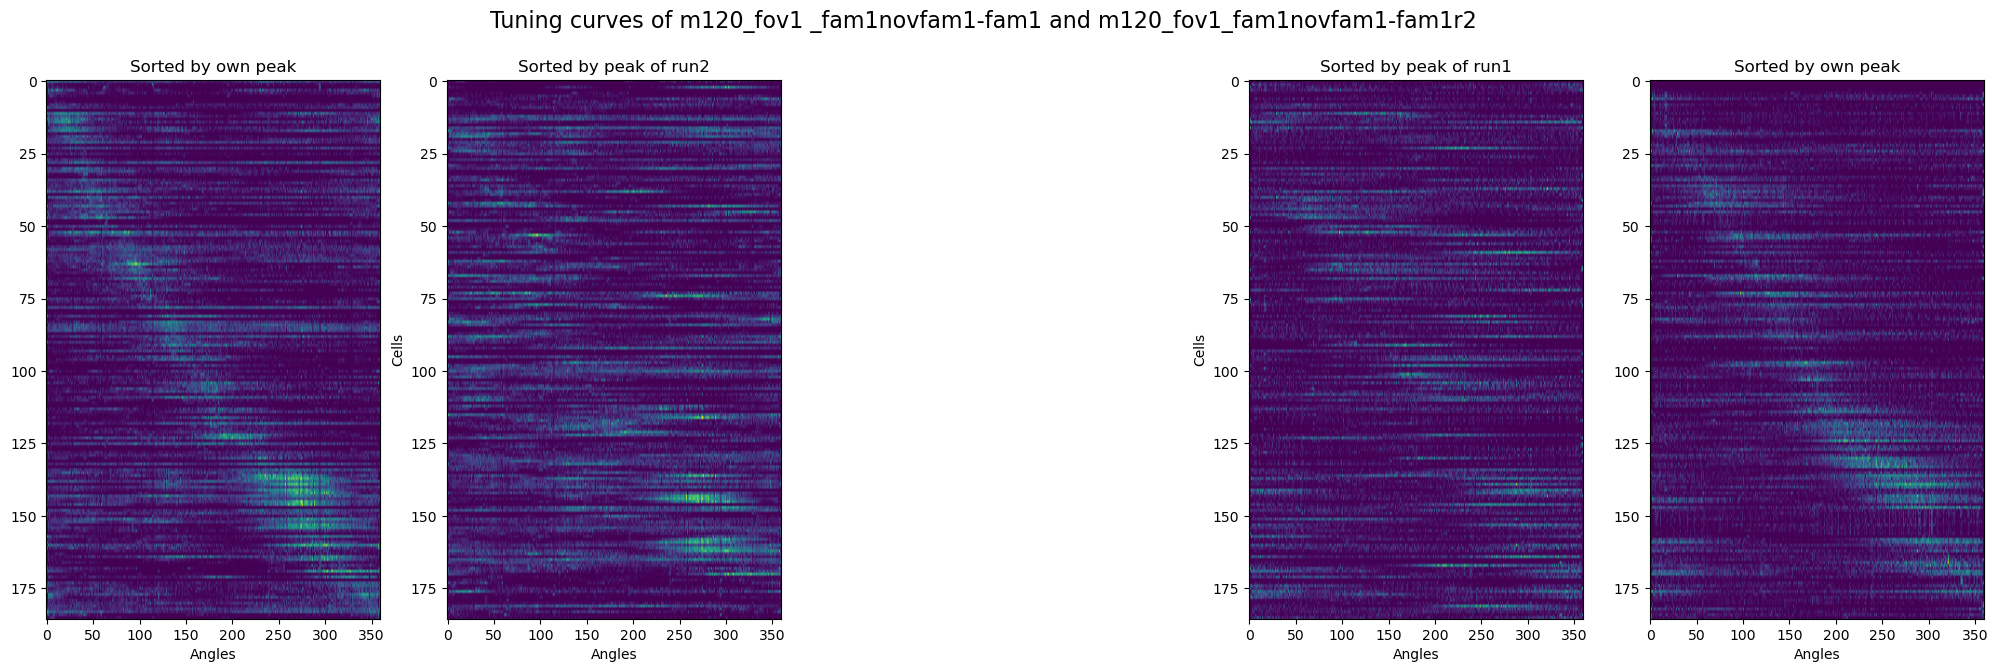

In [11]:
# Plot them
fig = plt.figure(figsize=(25, 7))
fig.suptitle(f'Tuning curves of {animal}_{fov} _{experiment1}-{run1} and {animal}_{fov}_{experiment2}-{run2}', fontsize=16)
grid = plt.GridSpec(ncols=5, nrows=1)



## Sorted by own peak
# Run1
ax = fig.add_subplot(grid[0, 0])
smoothed_tuning_curves1 = np.zeros((tuning_curves1.shape))
for i in range(tuning_curves1.shape[1]):
    smoothed_tuning_curves1[:,i] = np.convolve(tuning_curves1[:,i], np.ones((16,))/16, mode='same')
sorted_id_run1 = np.argsort(np.argmax(smoothed_tuning_curves1, axis=0))
ax.imshow(tuning_curves1[:,sorted_id_run1].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_title('Sorted by own peak')
# Run2
ax = fig.add_subplot(grid[0, 4])
smoothed_ring2 = np.zeros((tuning_curves2.shape))
for i in range(tuning_curves2.shape[1]):
    smoothed_ring2[:,i] = np.convolve(tuning_curves2[:,i], np.ones((16,))/16, mode='same')
sorted_id_run2 = np.argsort(np.argmax(smoothed_ring2, axis=0))
ax.imshow(tuning_curves2[:,sorted_id_run2].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_title('Sorted by own peak')

## Sorted by peak of the other run
# Run1
ax = fig.add_subplot(grid[0, 1])
ax.imshow(tuning_curves1[:,sorted_id_run2].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_ylabel('Cells')
ax.set_title('Sorted by peak of run2')
# Run2
ax = fig.add_subplot(grid[0, 3])
ax.imshow(tuning_curves2[:,sorted_id_run1].T, aspect='auto')
ax.set_xlabel('Angles')
ax.set_ylabel('Cells')
ax.set_title('Sorted by peak of run1')


plt.show()